 # Questions:
 
 1. Is there any strong or weak correlation between rainfall & price of onion & Tomato ?
 2. Is there any differences of price between states / Regions?
 3. Is there any other factors apart from rainfall on the price of onion & Tomato?
 4. How to analyse the supply & demand and decide which crop to harvest as a farmer?
 5. which region is the best place to sell?
 6. Average price of Onions is 1300. Prove it with 95% confidence level


In [102]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy
import scipy.stats as stats


# import statsmodels
import statsmodels.api as sm

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

In [70]:
data=pd.read_csv('Onion_weekly.csv')

In [71]:
data.head()

Year  CW   Location  Onion_Price  Rainfall
0  2015   1  Bangalore       1200.0       5.5
1  2015   2  Bangalore       1359.0       5.5
2  2015   3  Bangalore       1208.0       5.5
3  2015   4  Bangalore       1352.0       5.5
4  2015   5  Bangalore       1323.0       5.5

step 1: describe the data
Step 2 : plot the data with histogram, box plot, cross plot, heatmap (pearson correlation)
step 3 : check whether the data is normal and variances are equal and decide what tests can be done based on the questions (1 sample z test or t-test) - hypothesis testing
step 4 : Simulation
step 5 : Conclude with the suggestions based on test results

In [72]:
data.shape

(790, 5)

In [73]:
data.dtypes

Year             int64
CW               int64
Location        object
Onion_Price    float64
Rainfall       float64
dtype: object

In [74]:
data['Year']=data['Year'].astype('object',copy='False')
data['CW']=data['CW'].astype('object',copy='False')

In [75]:
data.dtypes

Year            object
CW              object
Location        object
Onion_Price    float64
Rainfall       float64
dtype: object

# description of the data

In [76]:
data.describe()

Onion_Price     Rainfall
count   783.000000   790.000000
mean   1449.222222   225.254430
std     999.672443   303.469795
min     321.000000     0.000000
25%     741.000000     9.500000
50%    1119.000000    71.800000
75%    1775.000000   375.800000
max    5533.000000  1272.100000

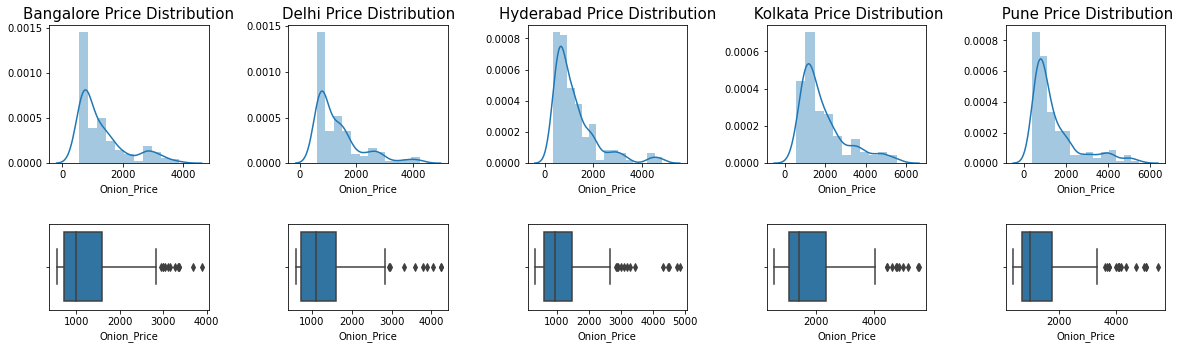

In [77]:
from matplotlib import gridspec
plt.rcParams['figure.figsize'] = [20,10]
gs = gridspec.GridSpec(5,5, width_ratios=[15, 15, 15, 15, 15], height_ratios=[.80, .50, .15, .15, .15],hspace =1, wspace=0.5)
a1 = plt.subplot(gs[0, 0])
a1.set_title("Bangalore Price Distribution", fontsize=15)
a1=sns.distplot(data[data['Location']=='Bangalore']['Onion_Price'])

a2 = plt.subplot(gs[0, 1])
a2.set_title("Delhi Price Distribution", fontsize=15)
a2=sns.distplot(data[data['Location']=='Delhi']['Onion_Price'])

a3 = plt.subplot(gs[0, 2])
a3.set_title("Hyderabad Price Distribution", fontsize=15)
a3=sns.distplot(data[data['Location']=='Hyderabad']['Onion_Price'])

a4 = plt.subplot(gs[0, 3])
a4.set_title(" Kolkata Price Distribution", fontsize=15)
a4=sns.distplot(data[data['Location']=='Kolkata']['Onion_Price'])

a5 = plt.subplot(gs[0, 4])
a5.set_title(" Pune Price Distribution", fontsize=15)
a5=sns.distplot(data[data['Location']=='Pune']['Onion_Price'])

b1 = plt.subplot(gs[1, 0])
b1= sns.boxplot(data[data['Location']=='Bangalore']['Onion_Price'])

b2 = plt.subplot(gs[1, 1])
b2= sns.boxplot(data[data['Location']=='Delhi']['Onion_Price'])

b3 = plt.subplot(gs[1, 2])
b3= sns.boxplot(data[data['Location']=='Hyderabad']['Onion_Price'])


b4 = plt.subplot(gs[1, 3])
b4= sns.boxplot(data[data['Location']=='Kolkata']['Onion_Price'])

b5 = plt.subplot(gs[1, 4])
b5 = sns.boxplot(data[data['Location']=='Pune']['Onion_Price'])

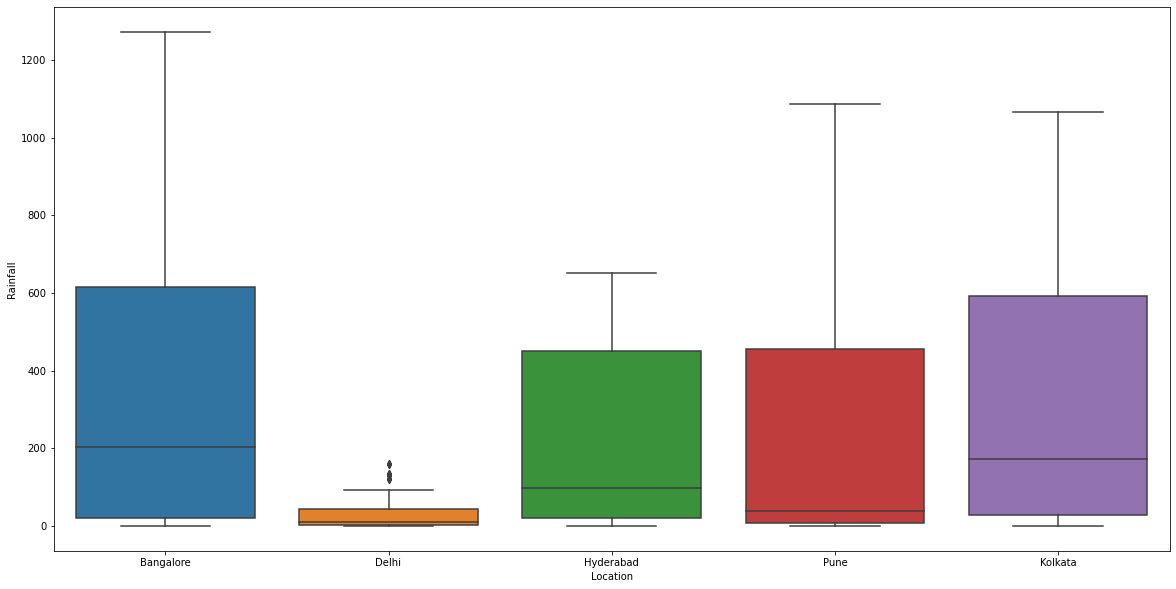

In [78]:
sns.boxplot(x='Location',y='Rainfall', data=data)
plt.show()


In [79]:
data['Onion_Price']

0      1200.0
1      1359.0
2      1208.0
3      1352.0
4      1323.0
        ...  
785    4625.0
786       NaN
787       NaN
788       NaN
789       NaN
Name: Onion_Price, Length: 790, dtype: float64

In [80]:
corr = data.corr()
corr

Onion_Price  Rainfall
Onion_Price     1.000000  0.168112
Rainfall        0.168112  1.000000

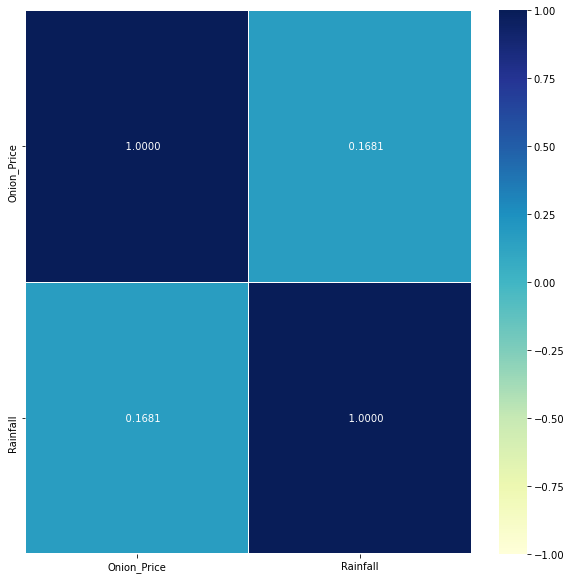

In [81]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')
plt.show()

3.How is the seasons affecting on the price of onion?


In [82]:
#Adding a date coulum
data['date'] = pd.to_datetime(data.CW.astype(str)+
                           data.Year.astype(str).add('-1') ,format='%V%G-%u')


In [83]:
#Addition of seasons based on the dates. 
def season_of_date(date):
    year = str(date.year)
    seasons = {'Spring': pd.date_range(start='01/02/'+year, end='31/03/'+year),
               'Summer': pd.date_range(start='01/04/'+year, end='30/06/'+year),
               'Monsoon': pd.date_range(start='01/07/'+year, end='15/09/'+year)}
    if date in seasons['Spring']:
        return 'Spring'
    if date in seasons['Summer']:
        return 'Summer'
    if date in seasons['Monsoon']:
        return 'Monsoon'
    else:
        return 'Winter'

# Assuming df has a date column of type `datetime`
data['season'] = data.date.map(season_of_date)

Null hypothesis = The onion price is same accross all the seasons
Alternate hypothesis= The onion price is not same accross all the seasons

Using ANOVA since we are trying to compare betweena categorical variable and a numerical variable
One-way ANOVA helps us to determine how the seasons impact the price ranges of onion. 

How does ANOVA work?
The ANOVA model starts by estimating the total amount of variation that exists Onion prices (this is why it is called Analysis of Variance).

In [110]:
lm=ols('Onion_Price ~ season',data=data).fit()
table=sm.stats.anova_lm(lm)
print(table)

             df        sum_sq       mean_sq          F        PR(>F)
season      3.0  1.556926e+08  5.189755e+07  64.602911  2.613132e-37
Residual  779.0  6.257951e+08  8.033314e+05        NaN           NaN


Degrees of freedom;
df1 = df of the explained part = number of groups — 1 (df1=3)
df2 = df of the residual = number of observations — number of groups(df2=790-4=786)

In [ ]:
Sum of Squares:
    variation is mathematically measured by the Sum of Squares

In [100]:
#From the ANOVA table we know that
#Sum of squares
SS_Explained=1.556926e+08
SS_Residual=6.257951e+08

#Degrees of freedom
DF_Residual=786
DF_Explained=3

#Computing the Mean Squares
MS_Explained=SS_Explained/DF_Explained
MS_Residual=SS_Residual/DF_Residual

#ANOVA F-test
#Computing the F statistic
f=MS_Explained/MS_Residual

P-value
Compute the p-value

In [111]:
p_value=1-scipy.stats.f.cdf(f,DF_Explained,DF_Residual)
p_value

1.1102230246251565e-16

#Interpreting  p-value

We have to compare the p-value to our chosen alpha, in this case, 0,05.
Our p-value of 1.11 is larger than 0,05, so we cannot reject our null hypothesis and we cannot accept our alternative. Even though the four season's sample means are different, we do not have a statistically significant difference.
This means that with the observed data, there is not enough evidence to assume that the onion price is different accross all the seasons. Therefore fe fail to refject the null hypothesis and agree that the seasons do not have any impact on the onion price ranges anoung the four states.